In [1]:
from sklearn.impute import SimpleImputer

import os
import pandas as pd
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve

import scikitplot as skplt
import matplotlib.pyplot as plt

In [2]:
loan_training_set4 = pd.read_csv('Loan_training_set_4_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
loan_training_set3 = pd.read_csv('Loan_training_set_3_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
loan_training_set2 = pd.read_csv('Loan_training_set_2_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
loan_training_set1 = pd.read_csv('Loan_training_set_1_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
frames = [loan_training_set1, loan_training_set2, loan_training_set3,loan_training_set4]
total_lendingclub = pd.concat(frames)

In [3]:
df = total_lendingclub.loc[:, loan_training_set1.columns.isin(["loan_status", "annual_inc",
"annual_inc_joint",
"application_type",
"dti",
"dti_joint",
"emp_length",
"grade",
"home_ownership",
"loan_amnt",
"mort_acc",
"open_act_il",
"open_rv_12m",
"pct_tl_nvr_dlq",
"pub_rec",
"pub_rec_bankruptcies",
"purpose",
"term",
"tot_coll_amt"
"tot_cur_bal",
"total_acc",
"int_rate"
])]



In [4]:
df = df[df["loan_status"]!="Current"]

In [5]:
df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
grade                        0
emp_length               25086
home_ownership               0
annual_inc                   0
loan_status                  0
purpose                      0
dti                         21
pub_rec                      0
total_acc                    0
application_type             0
annual_inc_joint        460541
dti_joint               460541
open_act_il             430839
open_rv_12m             430839
mort_acc                     0
pct_tl_nvr_dlq               0
pub_rec_bankruptcies         0
dtype: int64

# Variables numéricas

In [5]:
int_numeric = df["int_rate"].str.strip("%")
int_numeric = pd.to_numeric(int_numeric)
df["int_rate"] = int_numeric


In [6]:
from sklearn.impute import SimpleImputer

numericas = df.select_dtypes(exclude=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [7]:
numericas_df = df.select_dtypes(exclude=['object'])

In [26]:
numericas_df

,loan_amnt,int_rate,annual_inc,dti,pub_rec,total_acc,annual_inc_joint,dti_joint,open_act_il,open_rv_12m,mort_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies
8,11575,7.35,153000.0,16.99,1,46,NaN,NaN,1.0,2.0,2,95.7,1
10,7200,24.85,50000.0,6.07,0,5,NaN,NaN,1.0,0.0,0,80.0,0
24,7500,7.35,110000.0,13.12,0,27,NaN,NaN,4.0,1.0,4,100.0,0
42,10000,16.02,51979.0,10.11,2,21,NaN,NaN,1.0,2.0,0,100.0,2
91,14000,16.02,75000.0,10.86,0,10,NaN,NaN,2.0,2.0,1,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421088,11575,15.59,25400.0,27.08,0,18,NaN,NaN,NaN,NaN,0,100.0,0
421089,12000,11.99,63000.0,23.69,0,61,NaN,NaN,NaN,NaN,1,98.3,0
421092,13000,15.99,35000.0,30.90,1,22,NaN,NaN,NaN,NaN,0,100.0,1
421093,12000,19.99,64400.0,27.19,0,20,NaN,NaN,NaN,NaN,0,95.0,0


## Variables categóricas

In [8]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [9]:
categoricas = df.select_dtypes(include=['object']).drop(['loan_status'], axis=1).columns

categoricas

Index(['term', 'grade', 'emp_length', 'home_ownership', 'purpose',
       'application_type'],
      dtype='object')

In [10]:
categoricas_df = df.select_dtypes(include=['object']).drop(['loan_status'], axis=1)

In [13]:
categoricas_df

,term,grade,emp_length,home_ownership,purpose,application_type
8,36 months,A,6 years,OWN,credit_card,Individual
10,36 months,E,2 years,RENT,debt_consolidation,Individual
24,36 months,A,7 years,MORTGAGE,debt_consolidation,Individual
42,60 months,C,7 years,RENT,debt_consolidation,Individual
91,36 months,C,7 years,MORTGAGE,debt_consolidation,Individual
...,...,...,...,...,...,...
421088,36 months,D,10+ years,RENT,credit_card,Individual
421089,36 months,B,< 1 year,MORTGAGE,credit_card,Individual
421092,60 months,D,5 years,RENT,debt_consolidation,Individual
421093,60 months,E,1 year,RENT,debt_consolidation,Individual


## Concatenación

In [11]:
loan_status = pd.DataFrame(df['loan_status'])

In [12]:
lendingclub = pd.concat([numericas_df, loan_status, categoricas_df],  axis=1)

In [13]:
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numericas),
        ('cat', categorical_transformer, categoricas)])

In [14]:
lendingclub['loan_status'].mask(lendingclub['loan_status'] == 'Fully Paid', 1, inplace=True)
lendingclub['loan_status'].mask(lendingclub['loan_status'] != 1, 0, inplace=True)
lendingclub

,loan_amnt,int_rate,annual_inc,dti,pub_rec,total_acc,annual_inc_joint,dti_joint,open_act_il,open_rv_12m,mort_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,loan_status,term,grade,emp_length,home_ownership,purpose,application_type
8,11575,7.35,153000.0,16.99,1,46,NaN,NaN,1.0,2.0,2,95.7,1,1,36 months,A,6 years,OWN,credit_card,Individual
10,7200,24.85,50000.0,6.07,0,5,NaN,NaN,1.0,0.0,0,80.0,0,1,36 months,E,2 years,RENT,debt_consolidation,Individual
24,7500,7.35,110000.0,13.12,0,27,NaN,NaN,4.0,1.0,4,100.0,0,1,36 months,A,7 years,MORTGAGE,debt_consolidation,Individual
42,10000,16.02,51979.0,10.11,2,21,NaN,NaN,1.0,2.0,0,100.0,2,1,60 months,C,7 years,RENT,debt_consolidation,Individual
91,14000,16.02,75000.0,10.86,0,10,NaN,NaN,2.0,2.0,1,90.0,0,1,36 months,C,7 years,MORTGAGE,debt_consolidation,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421088,11575,15.59,25400.0,27.08,0,18,NaN,NaN,NaN,NaN,0,100.0,0,1,36 months,D,10+ years,RENT,credit_card,Individual
421089,12000,11.99,63000.0,23.69,0,61,NaN,NaN,NaN,NaN,1,98.3,0,0,36 months,B,< 1 year,MORTGAGE,credit_card,Individual
421092,13000,15.99,35000.0,30.90,1,22,NaN,NaN,NaN,NaN,0,100.0,1,0,60 months,D,5 years,RENT,debt_consolidation,Individual
421093,12000,19.99,64400.0,27.19,0,20,NaN,NaN,NaN,NaN,0,95.0,0,0,60 months,E,1 year,RENT,debt_consolidation,Individual


# SVM

El objetivo del SVM es
encontrar un hiperplano en un espacio N-dimensional (N - el número de características) que clasifica claramente los puntos de datos.

Para separar las dos clases de puntos de datos, hay muchos hiperplanos posibles que podrían elegirse. Nuestro objetivo es encontrar un plano que tenga el margen máximo, es decir, la distancia máxima entre puntos de datos de ambas clases. Maximizar la distancia del margen proporciona cierto refuerzo para que los puntos de datos futuros puedan clasificarse con más confianza.


### Kernel RBF

El kernel de la función de base radial no solo nos ayuda a evitar el cálculo de algunas características adicionales. El espacio de características RBF tiene un número infinito de dimensiones. Esto significa que podemos utilizar el kernel para construir límites de decisión muy complejos. Cuantas más dimensiones, más posibilidades hay de que encontremos un hiperplano que separe perfectamente nuestros datos.

La parte de base radial del nombre proviene del hecho de que esta función disminuye de valor a medida que se aleja del centro. (En este caso, el centro es el vector de soporte). Esto explica por qué los límites de decisión tienen forma de campana cuando los visualizamos.

#### C: El parámetro de penalización
¿Qué hace el parámetro C en la clasificación SVM? Le dice al algoritmo cuánto le importan los puntos mal clasificados.


#### Gamma 

El parámetro gamma determina qué tan rápido ocurre esta disipación; los valores mayores disminuyen el efecto de cualquier vector de soporte individual.

In [36]:
from sklearn.model_selection import train_test_split
a =lendingclub.sample(n=10000, random_state=1234)


X = a.drop('loan_status', axis=1)
y = a['loan_status']


y = y.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
svc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel = "rbf"))])

In [38]:
svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec', 'total_acc',
       'annual_inc_joint', 'dti_joint', 'open_act_il', 'open_rv_12m',
       'mort_acc', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                            

In [39]:
y_pred = svc.predict(X_test)

In [40]:
print('Accuracy: %.4f'%accuracy_score(y_test, y_pred))
print('AUC: %.4f'%roc_auc_score(y_test, y_pred))
print('F1-Score: %.4f'%f1_score(y_test, y_pred))

print('\nClassification Report                       : ')
print(classification_report(y_test, y_pred))


Accuracy: 0.7465
AUC: 0.5316
F1-Score: 0.8511

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.58      0.08      0.15       519
           1       0.75      0.98      0.85      1481

    accuracy                           0.75      2000
   macro avg       0.67      0.53      0.50      2000
weighted avg       0.71      0.75      0.67      2000



# Tune

In [39]:
param_grid = {'classifier__C': [10,1, 9]}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(svc, param_grid, n_jobs= 3, verbose =3 )
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:   56.7s finished


{'classifier__C': 10}
0.7521428571428572


In [44]:
svc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(C= 10, kernel = "rbf",probability=True))])

In [45]:
svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec', 'total_acc',
       'annual_inc_joint', 'dti_joint', 'open_act_il', 'open_rv_12m',
       'mort_acc', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                            

In [46]:
y_pred = svc.predict(X_test)

# SCORING MODELO FINAL

In [47]:
print('Accuracy: %.4f'%accuracy_score(y_test, y_pred))
print('AUC: %.4f'%roc_auc_score(y_test, y_pred))
print('F1-Score: %.4f'%f1_score(y_test, y_pred))

print('\nClassification Report                       : ')
print(classification_report(y_test, y_pred))


Accuracy: 0.7500
AUC: 0.5746
F1-Score: 0.8477

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.55      0.21      0.30       519
           1       0.77      0.94      0.85      1481

    accuracy                           0.75      2000
   macro avg       0.66      0.57      0.58      2000
weighted avg       0.71      0.75      0.71      2000



In [59]:
# Save to file in the current working directory
svm_rbf_pkl = "svm_rbf.pkl"
with open(svm_rbf_pkl, 'wb') as file:
    pickle.dump(svc, file)

# PLOTING

Confusion matrix, without normalization
[[ 109  410]
 [  90 1391]]
Normalized confusion matrix
[[0.21001927 0.78998073]
 [0.06076975 0.93923025]]


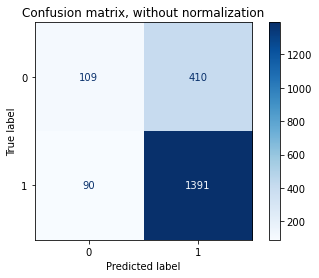

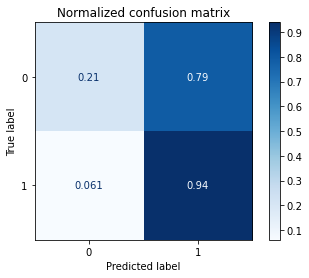

In [49]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [50]:
prob_predictions = svc.predict_proba(X_test)

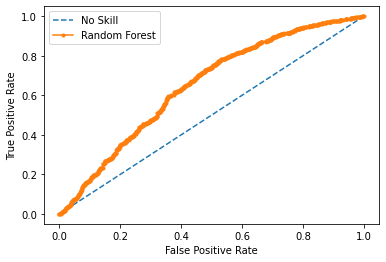

In [51]:
# keep probabilities for the positive outcome only
yhat = prob_predictions[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [52]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [53]:
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.774189, G-Mean=0.619


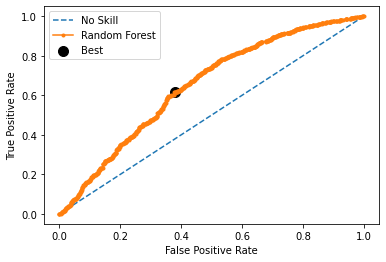

In [54]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [55]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

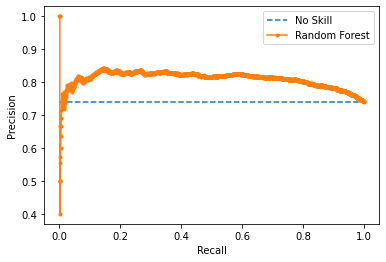

In [56]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

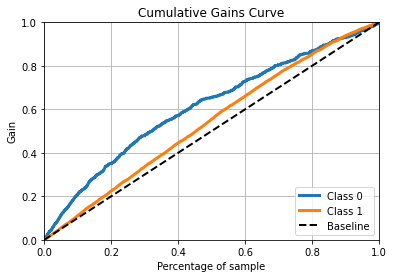

In [57]:
skplt.metrics.plot_cumulative_gain(y_test, prob_predictions)
plt.show()